In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Meteorite_Landings.csv")

# Basic data info
print("Data Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:")
print(df.isnull().sum())

In [6]:
# Convert numeric columns
df['mass (g)'] = pd.to_numeric(df['mass (g)'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['reclat'] = pd.to_numeric(df['reclat'], errors='coerce')
df['reclong'] = pd.to_numeric(df['reclong'], errors='coerce')

# Create binary fall indicator
df['fell'] = df['fall'].apply(lambda x: 1 if x == 'Fell' else 0)

# Extract decade for temporal analysis
df['decade'] = (df['year'] // 10) * 10

# Clean recclass by extracting main type
df['main_type'] = df['recclass'].str.split(',').str[0].str.split('-').str[0]

# Remove extreme outliers for mass visualization
mass_upper_limit = df['mass (g)'].quantile(0.99)
df_clean = df[df['mass (g)'] <= mass_upper_limit].copy()


Basic Statistics:
           mass (g)          year
count  4.558500e+04  45425.000000
mean   1.327808e+04   1991.828817
std    5.749889e+05     25.052766
min    0.000000e+00    860.000000
25%    7.200000e+00   1987.000000
50%    3.260000e+01   1998.000000
75%    2.026000e+02   2003.000000
max    6.000000e+07   2101.000000


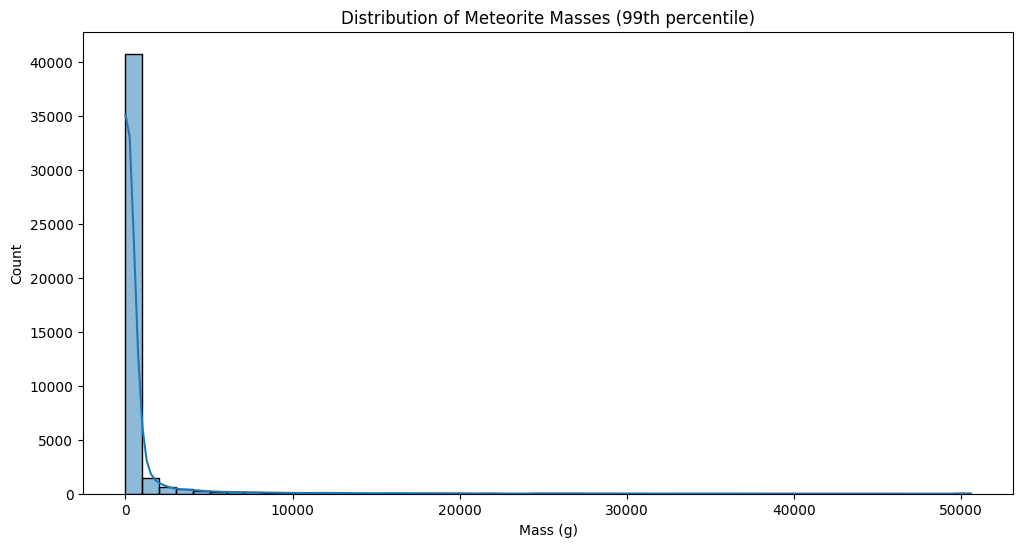

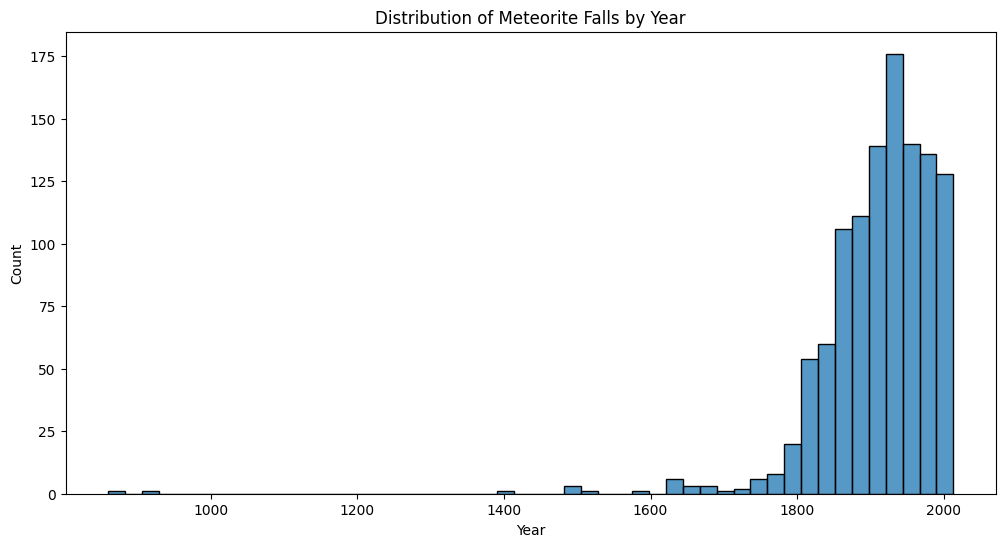

In [7]:
print("\nBasic Statistics:")
print(df[['mass (g)', 'year']].describe())

# Mass distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['mass (g)'], bins=50, kde=True)
plt.title('Distribution of Meteorite Masses (99th percentile)')
plt.xlabel('Mass (g)')
plt.ylabel('Count')
plt.show()

# Year distribution (for falls only)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['fell'] == 1]['year'], bins=50)
plt.title('Distribution of Meteorite Falls by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

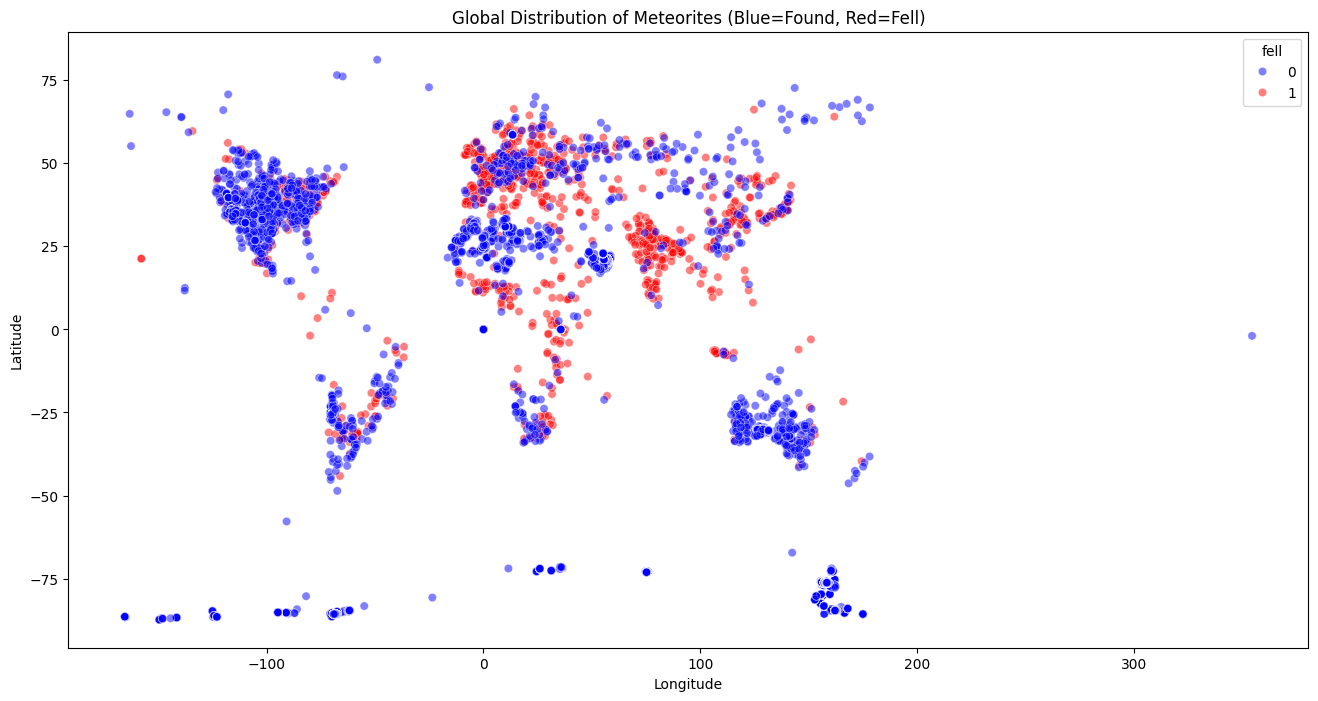

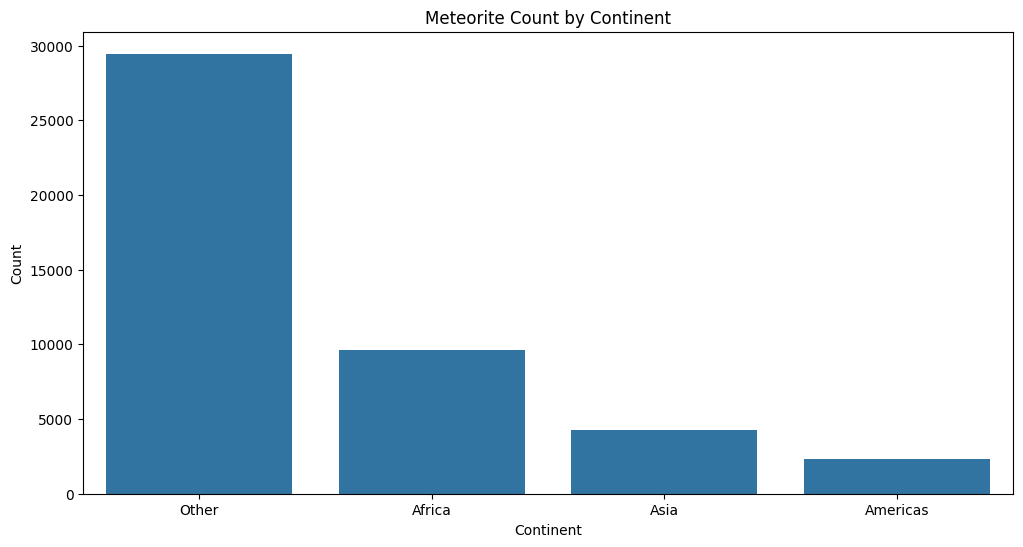

In [8]:
# World map visualization
plt.figure(figsize=(16, 8))
sns.scatterplot(x='reclong', y='reclat', data=df, 
                hue='fell', alpha=0.5, palette=['blue', 'red'])
plt.title('Global Distribution of Meteorites (Blue=Found, Red=Fell)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Continent analysis
def get_continent(lat, lon):
    if -60 <= lat <= 80:  # Exclude Antarctica
        if -20 <= lon <= 50:
            return 'Africa'
        elif -170 <= lon <= -50:
            return 'Americas'
        elif 50 <= lon <= 180:
            return 'Asia'
        elif -10 <= lon <= 50:
            return 'Europe'
    return 'Other'

df['continent'] = df.apply(lambda x: get_continent(x['reclat'], x['reclong']), axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(x='continent', data=df, order=df['continent'].value_counts().index)
plt.title('Meteorite Count by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

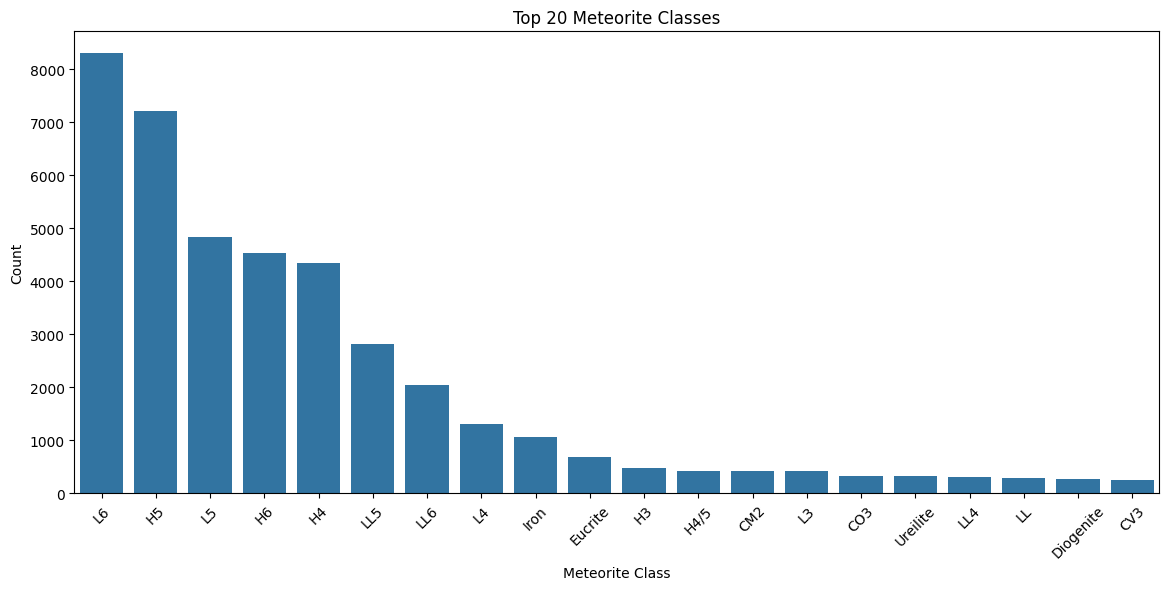

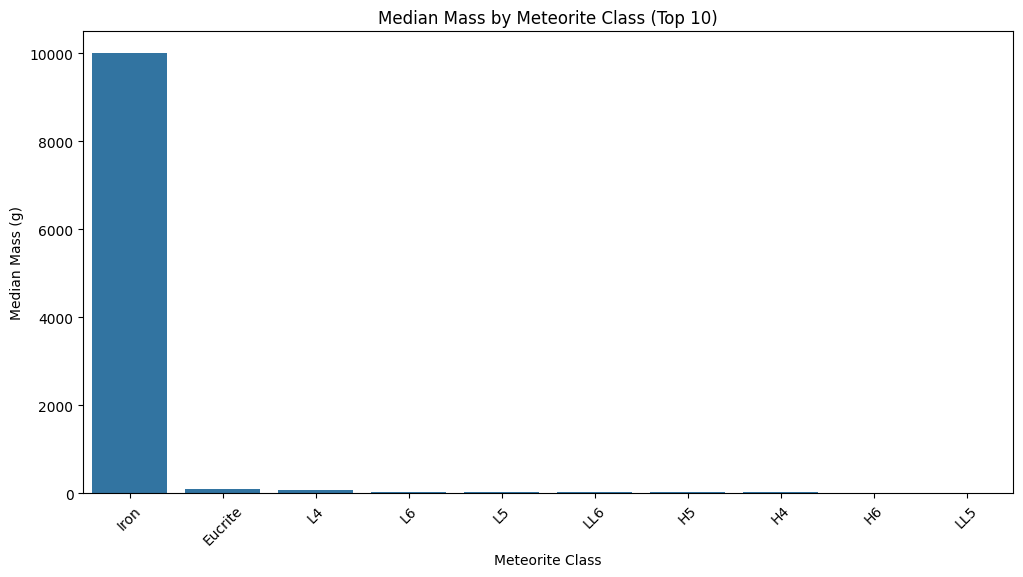

In [9]:
# Top 20 meteorite classes
top_classes = df['main_type'].value_counts().head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_classes.index, y=top_classes.values)
plt.title('Top 20 Meteorite Classes')
plt.xlabel('Meteorite Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Mass by class (top 10)
top_10_classes = top_classes.index[:10]
class_mass = df[df['main_type'].isin(top_10_classes)].groupby('main_type')['mass (g)'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_mass.index, y=class_mass.values)
plt.title('Median Mass by Meteorite Class (Top 10)')
plt.xlabel('Meteorite Class')
plt.ylabel('Median Mass (g)')
plt.xticks(rotation=45)
plt.show()

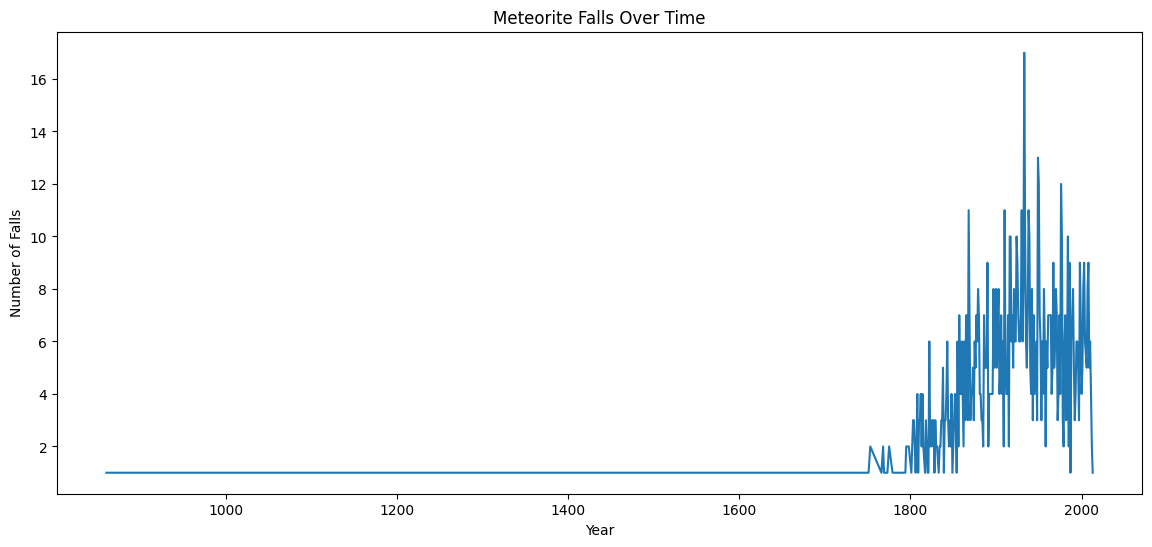

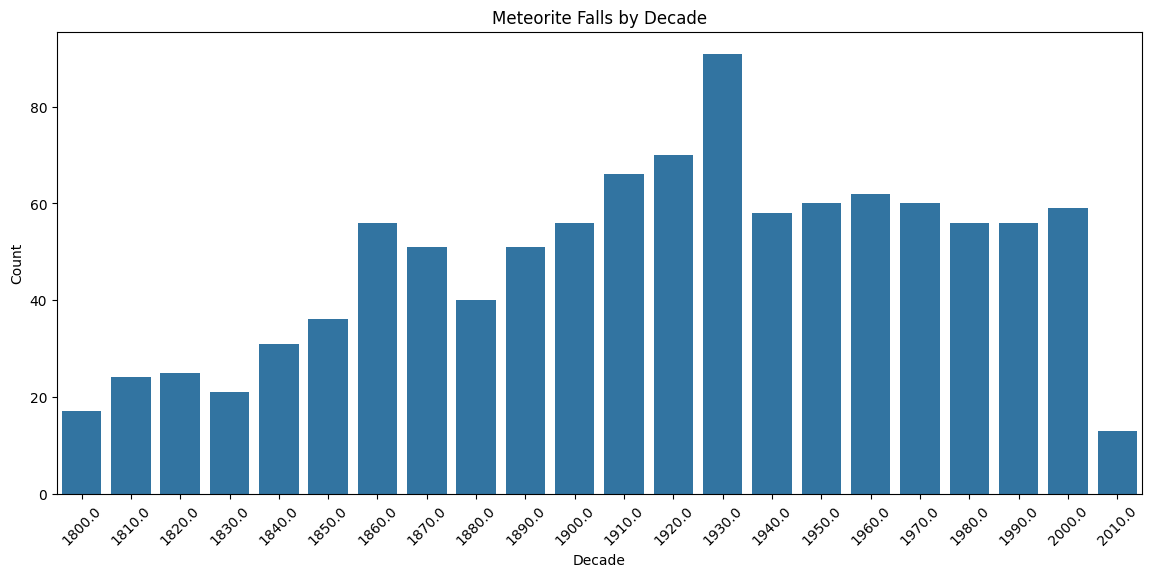

In [10]:
# Falls over time
falls = df[df['fell'] == 1].dropna(subset=['year'])

plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='fell', data=falls.groupby('year')['fell'].count().reset_index())
plt.title('Meteorite Falls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Falls')
plt.show()

# Decadal trends
plt.figure(figsize=(14, 6))
sns.countplot(x='decade', data=falls[falls['decade'] >= 1800])
plt.title('Meteorite Falls by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

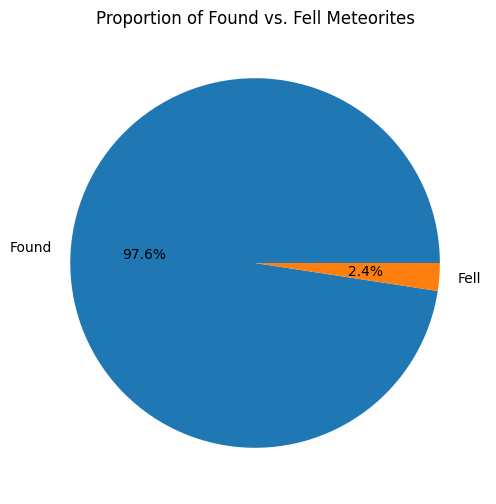

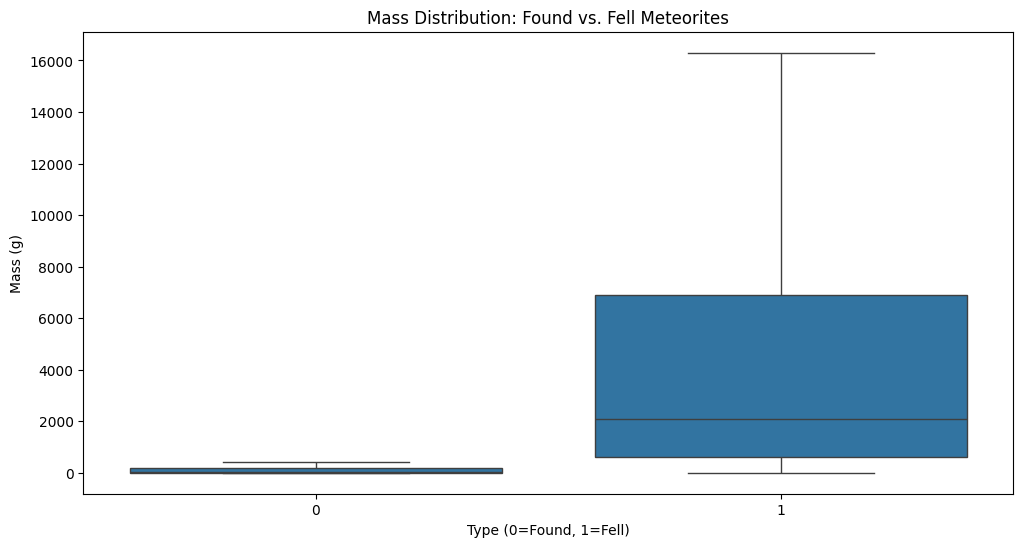

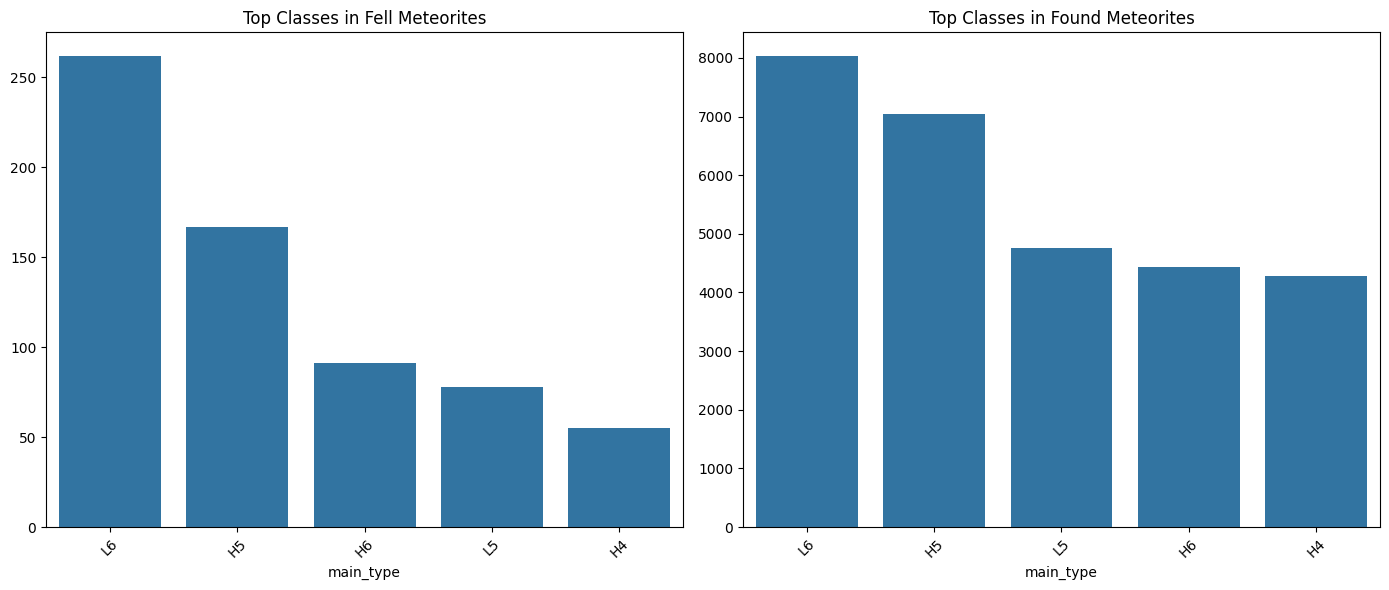

In [11]:
# Fall vs Found proportions
fall_counts = df['fell'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(fall_counts, labels=['Found', 'Fell'], autopct='%1.1f%%')
plt.title('Proportion of Found vs. Fell Meteorites')
plt.show()

# Mass comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='fell', y='mass (g)', data=df_clean, showfliers=False)
plt.title('Mass Distribution: Found vs. Fell Meteorites')
plt.xlabel('Type (0=Found, 1=Fell)')
plt.ylabel('Mass (g)')
plt.show()

# Class distribution comparison
common_classes = df['main_type'].value_counts().head(5).index
fall_class = df[df['main_type'].isin(common_classes) & (df['fell'] == 1)]['main_type'].value_counts()
found_class = df[df['main_type'].isin(common_classes) & (df['fell'] == 0)]['main_type'].value_counts()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=fall_class.index, y=fall_class.values)
plt.title('Top Classes in Fell Meteorites')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=found_class.index, y=found_class.values)
plt.title('Top Classes in Found Meteorites')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

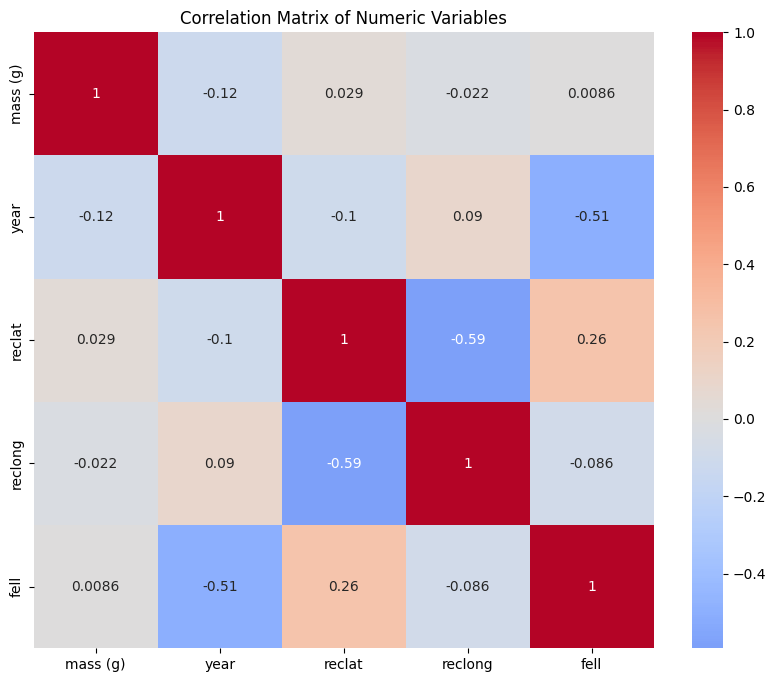

In [12]:
# Correlation matrix (for numeric variables)
numeric_df = df[['mass (g)', 'year', 'reclat', 'reclong', 'fell']].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [ ]:
"""Key Findings:
Geographical Distribution: Meteorites are concentrated in North Africa, the Middle East, and North America - likely due to both natural distribution and ease of discovery in deserts.

Mass Characteristics:

Most meteorites are small (median ~720g)

Distribution is highly right-skewed with a few very large specimens

Iron meteorites tend to be significantly more massive than stony ones

Classification:

L6, H5, and H6 ordinary chondrites are the most common types

Found meteorites show different class distributions than observed falls

Temporal Patterns:

Reported falls have increased dramatically since 1950

This likely reflects improved observation rather than actual increase

Fall vs Found:

Only ~10% of meteorites were observed falls

Found meteorites tend to be larger on average

Different class distributions between falls and finds""